In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [2]:
data_1 = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_statistics/all_data/5_task_1.csv')

In [3]:
data_1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [32]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


В первом эксперименте тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 

id – id клиента в эксперименте

group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)

events – сколько блюд суммарно было заказано за период

# Проведем oneway-ANOVA

Для начала проверим гомогенность дисперсий с помощью теста Левина

In [7]:
pg.homoscedasticity(data=data_1, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


Тест показал p-value > 0.05, что не позволяет отклонить нулевую гипотезу о равенстве дисперсий

Проверим, что данные нормально распределены

In [10]:
pg.normality(data=data_1, dv='events', group='group', method='normaltest')

,W,pval,normal
group,,,
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


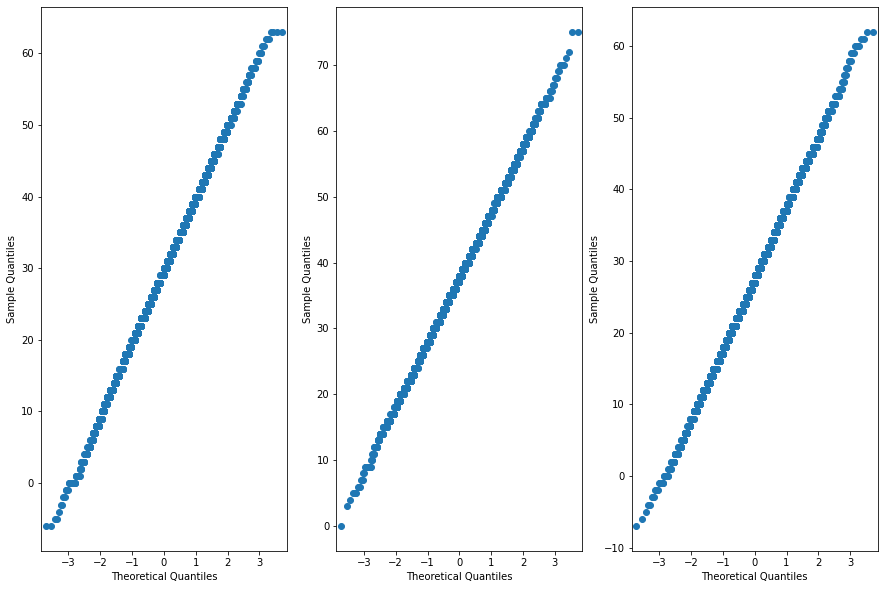

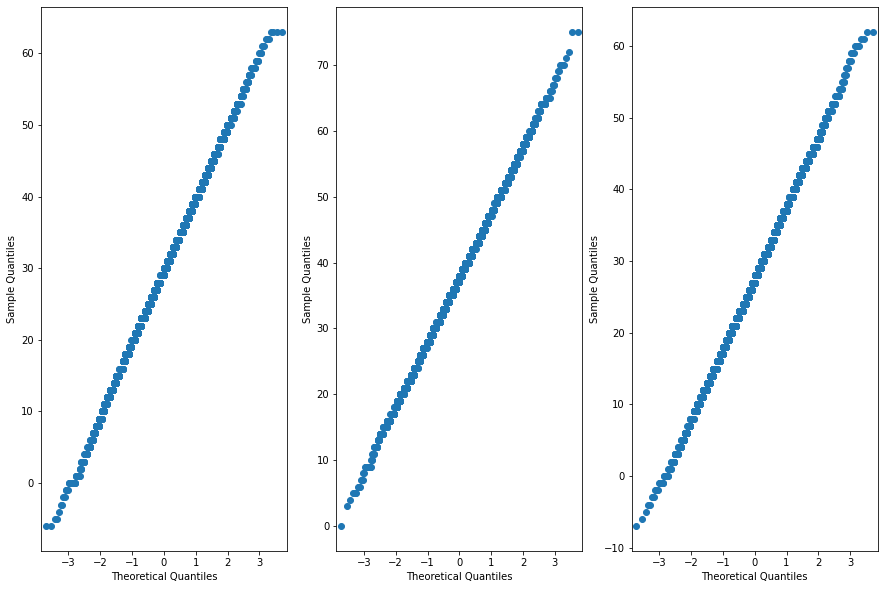

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
sm.qqplot(data_1.query('group == "A"').events, ax=ax.flatten()[0])
sm.qqplot(data_1.query('group == "B"').events, ax=ax.flatten()[1])
sm.qqplot(data_1.query('group == "C"').events, ax=ax.flatten()[2])

Вывод: все группы имеют нормальное распределение

In [39]:
#считаем ANOVA
pg.anova(data=data_1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


<AxesSubplot:xlabel='group', ylabel='events'>

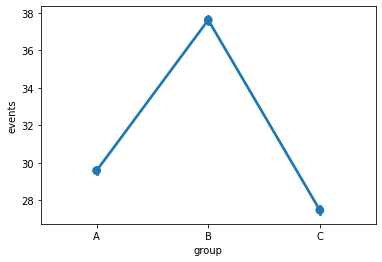

In [35]:
sns.pointplot(data=data_1, x='group', y='events')

Для сравнения средних я использую однофакторный дисперсионный анализ. Значение статистики равно 2886, а р-уровень значимости составил 0

Проведем попарные сравнения групп при помощи различных тестов

In [43]:
#попарные сравнения без поправки
pg.pairwise_tests(data=data_1, dv='events', between='group')

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,inf,1.024138


In [44]:
#попарные сравнения с поправкой Бонферрони
pg.pairwise_tests(data=data_1, dv='events', between='group', padjust='holm')

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in scalar divide
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,7.500262e-50,holm,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,1.024138


In [45]:
# тьюки
pg.pairwise_tukey(data=data_1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


Все тесты показывают статзначимые различия. Вывод: используем квадратные картинки(группа B)

# Проведем twoway-ANOVA

In [48]:
data_2 = pd.read_csv('C:/Users/1/JupyterProjects/Karpov_courses_lessons_and_projects/module_statistics/all_data/5_task_2.csv')

In [49]:
data_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


id – id клиента в эксперименте

segment – сегмент (high/low)

group – вид кнопки (control – старая версия, test – новая версия)

events – сколько блюд суммарно было заказано за период

In [51]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


Визуализируем распределения events для контрольной и тестовой групп.

Text(0.5, 1.0, 'control')

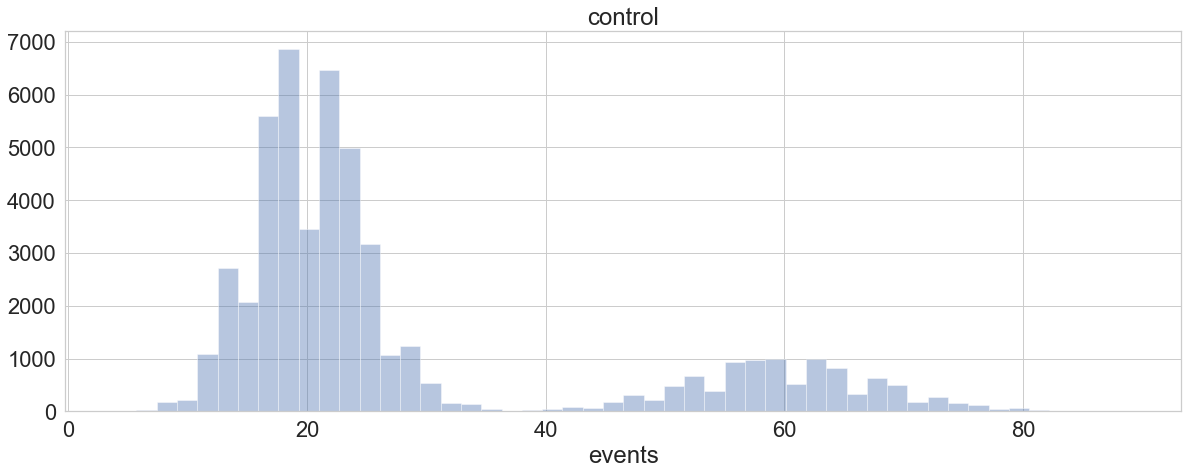

In [65]:
ax = sns.distplot(data_2.query('group == "control"').events, kde=False)
ax.set_title('control')

C:\Users\1\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'test')

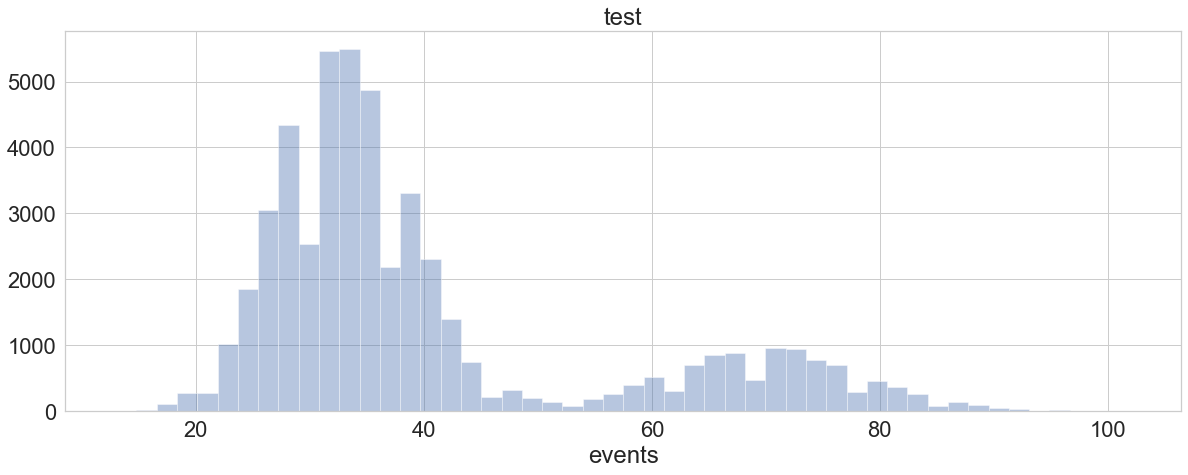

In [66]:
ax = sns.distplot(data_2.query('group == "test"').events, kde=False)
ax.set_title('test')

In [72]:
data_2.groupby(['group', 'segment'], as_index=False).agg({'events': ['mean', 'median', 'std']})

group segment     events                 
                         mean median       std
0  control    high  59.970800   60.0  7.805347
1  control     low  20.031575   20.0  4.473576
2     test    high  69.938500   70.0  8.403974
3     test     low  33.025925   33.0  5.720845

Проведем многофакторный ANOVA

In [76]:
pg.anova(data=data_2, dv='events', between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


<AxesSubplot:xlabel='group', ylabel='events'>

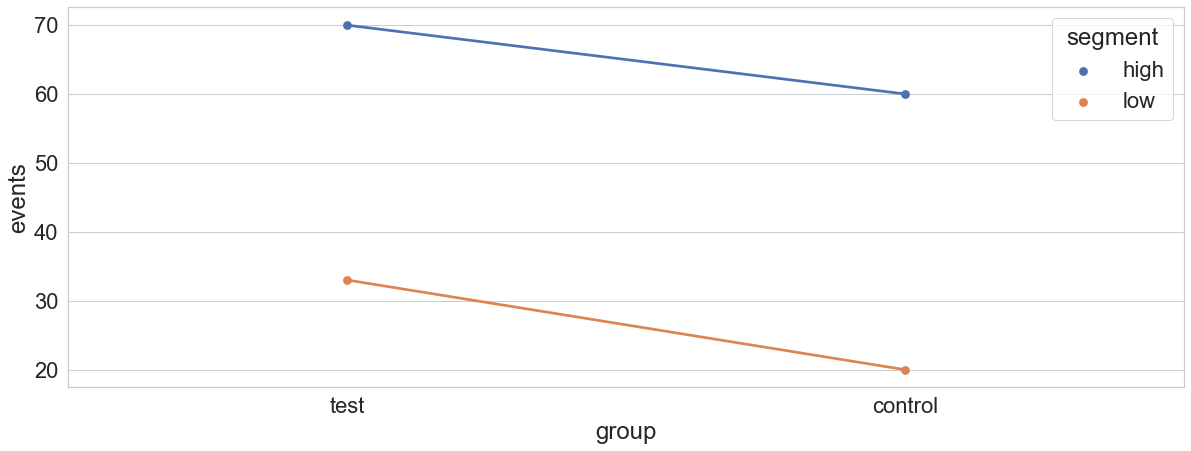

In [79]:
sns.pointplot(data=data_2, y='events', x='group', hue='segment')

Используем Тьюки для сравнения попарно групп

In [83]:
data_2['combination'] = data_2['group'] + ' / ' + data_2['segment']

In [84]:
data_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high


In [86]:
pg.pairwise_tukey(data=data_2, dv='events', between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control / high,control / low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,7.521612
1,control / high,test / high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.228989
2,control / high,test / low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.350026
3,control / low,test / high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-9.091140
4,control / low,test / low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.530414
5,test / high,test / low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,5.814008


Для обоих сегментов показатели статистически значимо увеличились по сравнению с контрольной группой

Фактор group оказался ЗНАЧИМЫМ, фактор segment – ЗНАЧИМЫМ, их взаимодействие – ЗНАЧИМО. Судя по графику, для всех групп среднее значение events УВЕЛИЧИЛОСЬ, поэтому решение: ВЫКАТЫВАЕМ НОВУЮ ВЕРСИЮ